In [1]:
import pandas as pd
import numpy as np

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Jialin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Jialin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [321]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [246]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense, Dropout
from keras.layers import Flatten, Conv1D, LSTM, MaxPooling1D, SpatialDropout1D, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [5]:
df = pd.read_csv("dataset.csv", encoding = 'utf-8')

In [8]:
len(df)

7395

In [13]:
df.head()

,text,cat,topic,cluster
0,SeaWorld’s profits fell by 84% and customers a...,ele,SeaWorld,2.0
1,The company teaches dolphins and killer whales...,ele,SeaWorld,2.0
2,It says fewer people are going to its parks an...,ele,SeaWorld,2.0
3,SeaWorld has been in the news since the 2013 d...,ele,SeaWorld,2.0
4,Animal rights organizations say that orcas kep...,ele,SeaWorld,2.0


In [69]:
# convert cat to numeric levels
# 0: ele, 1: int, 2: adv
level = []
for c in df.cat:
    if c == 'ele':
        level.append(0)
    elif c == 'int':
        level.append(1)
    elif c == 'adv':
        level.append(2)

df['level'] = level

In [111]:
df.head()

,text,cat,topic,cluster,level
0,SeaWorld’s profits fell by 84% and customers a...,ele,SeaWorld,2.0,0
1,The company teaches dolphins and killer whales...,ele,SeaWorld,2.0,0
2,It says fewer people are going to its parks an...,ele,SeaWorld,2.0,0
3,SeaWorld has been in the news since the 2013 d...,ele,SeaWorld,2.0,0
4,Animal rights organizations say that orcas kep...,ele,SeaWorld,2.0,0


### Text Cleaning

In [323]:
#Cleaning the text
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    4. Remove words
    '''
    stemmer = WordNetLemmatizer()
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join([i for i in nopunc if not i.isdigit()])
    nopunc =  [word.lower() for word in nopunc.split()]
    return ' '.join([stemmer.lemmatize(word) for word in nopunc])

In [326]:
cluster_df0['text'] = cluster_df0['text'].map(lambda com : text_process(com))
cluster_df1['text'] = cluster_df1['text'].map(lambda com : text_process(com))
cluster_df2['text'] = cluster_df2['text'].map(lambda com : text_process(com))

/Users/Jialin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Jialin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Jialin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [306]:
# cluster_df0.to_csv('cluster0.csv',index=False)
# cluster_df1.to_csv('cluster1.csv',index=False)
# cluster_df2.to_csv('cluster2.csv',index=False)

In [143]:
# # topic list
# cluster_text0 = []
# #cluster_text1 = []
# #cluster_text2 = []
# for t in cluster_df0.text:
#     myt = text_process(t)
#     if (t not in cluster_text0):
#         cluster_text0.append(myt)

### Train and Test Split

In [482]:
X_train, X_test, y_train, y_test = train_test_split(list(df['text']), list(df.level), test_size=0.2, random_state=45)

In [469]:
X_train, X_test, y_train, y_test = train_test_split(list(cluster_df0['text']), list(cluster_df0.level), test_size=0.2, random_state=45)

In [474]:
X_train, X_test, y_train, y_test = train_test_split(list(cluster_df1['text']), list(cluster_df1.level), test_size=0.2, random_state=45)

In [478]:
X_train, X_test, y_train, y_test = train_test_split(list(cluster_df2['text']), list(cluster_df2.level), test_size=0.2, random_state=45)

### Tokenization

In [46]:
#API embedding
# tokenizer = Tokenizer(num_words=5000)
# tokenizer.fit_on_texts(X_train)

# X_train = tokenizer.texts_to_sequences(X_train)
# X_test = tokenizer.texts_to_sequences(X_test)
# # Adding 1 because of reserved 0 index
# vocab_size = len(tokenizer.word_index) + 1

# maxlen = 50

# X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
# X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [78]:
# word embeddings
embeddings_dictionary = dict()
glove_file = open('/Users/Jialin/Downloads/OneStopEnglishCorpus-master/glove/glove.6B.50d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = np.zeros((vocab_size, 50))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [483]:
#word embedding from document
word_tokenizer = Tokenizer(lower=False)
word_tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(word_tokenizer.word_index) + 1
#embedded_sentences = word_tokenizer.texts_to_sequences(X_train)

X_train = pad_sequences(X_train,30, padding='post')
X_test = pad_sequences(X_test, 30, padding='post')

In [484]:
X_train.shape

(5916, 30)

Model: "sequential_122"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_106 (Embedding)    (None, 30, 200)           3756000   
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 26, 64)            64064     
_________________________________________________________________
max_pooling1d_66 (MaxPooling (None, 6, 64)             0         
_________________________________________________________________
lstm_97 (LSTM)               (None, 128)               98816     
_________________________________________________________________
dense_153 (Dense)            (None, 1)                 129       
Total params: 3,919,009
Trainable params: 3,919,009
Non-trainable params: 0
_________________________________________________________________
Train on 4732 samples, validate on 1184 samples
Epoch 1/5
4732/4732 [==============================] - 10s 2

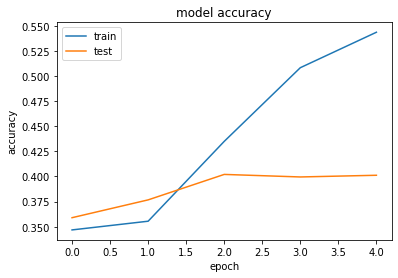

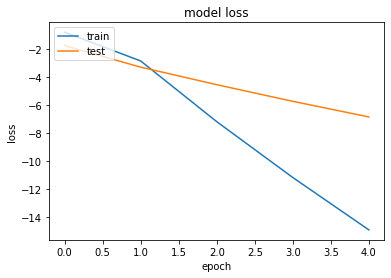

In [485]:
# LSTM + CNN
model = Sequential()
model.add(Embedding(vocab_size, 200, input_length=X_train.shape[1]))
# model.add(Dropout(0.2))
# model.add(SpatialDropout1D(0.2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
# model.add(Dense(256, kernel_regularizer=l2(0.001),activation='relu', input_shape=(n_cols,)))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc',f1_m,precision_m, recall_m])
model.summary()
# fit network
test_model(model)

In [426]:
# LSTM only
model = Sequential()
model.add(Embedding(vocab_size, 200, input_length=X_train.shape[1]))
model.add(Dropout(0.2))
# model.add(SpatialDropout1D(0.2))
# model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
# model.add(Dense(256, kernel_regularizer=l2(0.001),activation='relu', input_shape=(n_cols,)))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc',f1_m,precision_m, recall_m])
model.summary()
# fit network
test_model(model)

Model: "sequential_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_80 (Embedding)     (None, 30, 200)           2174600   
_________________________________________________________________
dropout_25 (Dropout)         (None, 30, 200)           0         
_________________________________________________________________
max_pooling1d_40 (MaxPooling (None, 7, 200)            0         
_________________________________________________________________
lstm_71 (LSTM)               (None, 128)               168448    
_________________________________________________________________
dense_126 (Dense)            (None, 1)                 129       
Total params: 2,343,177
Trainable params: 2,343,177
Non-trainable params: 0
_________________________________________________________________
Train on 2700 samples, validate on 675 samples
Epoch 1/6
2700/2700 [==============================] - 6s 2ms/

In [427]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

def SVM(df):
    train, test = train_test_split(df, test_size=0.20, shuffle=True)
    X_train = train.text
    X_test = test.text

    # Create feature vectors
    vectorizer = TfidfVectorizer(min_df = 5,
                                 max_df = 0.8,
                                 sublinear_tf = True,
                                 use_idf = True)
    train_vectors = vectorizer.fit_transform(train['text'])
    test_vectors = vectorizer.transform(test['text'])

    # Perform classification with SVM, kernel=linear
    classifier_linear = svm.SVC(kernel='linear')
    t0 = time.time()
    classifier_linear.fit(train_vectors, train['level'])
    t1 = time.time()
    prediction_linear = classifier_linear.predict(test_vectors)
    t2 = time.time()
    time_linear_train = t1-t0
    time_linear_predict = t2-t1
    # results
    print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
    # report = classification_report(test['food_pos'], prediction_linear, output_dict=True)
    print(classification_report(test['level'], prediction_linear))

In [428]:
SVM(cluster_df0)
SVM(cluster_df1)
SVM(cluster_df2)

Training time: 2.247839s; Prediction time: 0.445218s
              precision    recall  f1-score   support

           0       0.41      0.33      0.37       251
           1       0.33      0.34      0.34       283
           2       0.38      0.42      0.40       310

    accuracy                           0.37       844
   macro avg       0.37      0.37      0.37       844
weighted avg       0.37      0.37      0.37       844

Training time: 0.227201s; Prediction time: 0.041394s
              precision    recall  f1-score   support

           0       0.33      0.21      0.26        71
           1       0.15      0.19      0.17        85
           2       0.21      0.23      0.22        96

    accuracy                           0.21       252
   macro avg       0.23      0.21      0.22       252
weighted avg       0.23      0.21      0.21       252

Training time: 0.549699s; Prediction time: 0.092322s
              precision    recall  f1-score   support

           0       0.38 

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 30, 200)           3155400   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 23, 32)            51232     
_________________________________________________________________
flatten_1 (Flatten)          (None, 736)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 737       
Total params: 3,207,369
Trainable params: 3,207,369
Non-trainable params: 0
_________________________________________________________________
None
Train on 4732 samples, validate on 1184 samples
Epoch 1/6
4732/4732 [==============================] - 2s 511us/step - loss: -0.0020 - acc: 0.3462 - f1_m: 0.8245 - precision_m: 0.7052 - recall_m: 0.9970 - val_loss: -1.2118 - val_acc: 0.

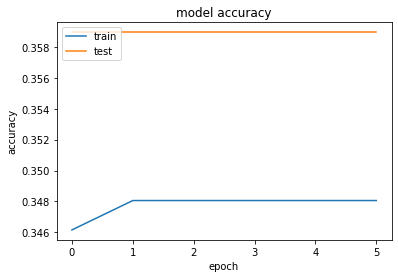

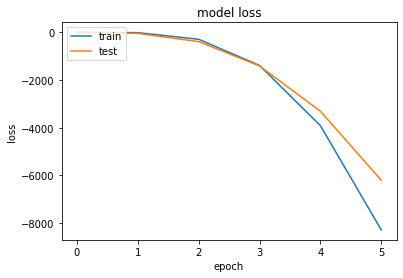

In [92]:
# CNN
model = Sequential()
model.add(Embedding(vocab_size, 200, input_length=30))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dense(256, activation='relu', input_shape=(n_cols,)))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

# model.add(Dense(10, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc',f1_m,precision_m, recall_m])
print(model.summary())
# fit network
test_model(model)

In [261]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

train, test = train_test_split(cluster_df0, test_size=0.20, shuffle=True)
X_train = train.text
X_test = test.text

# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(train['text'])
test_vectors = vectorizer.transform(test['text'])

# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, train['level'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
# report = classification_report(test['food_pos'], prediction_linear, output_dict=True)
print(classification_report(test['level'], prediction_linear))

Training time: 2.411561s; Prediction time: 0.442625s
              precision    recall  f1-score   support

           0       0.41      0.39      0.40       225
           1       0.37      0.32      0.34       313
           2       0.39      0.46      0.42       306

    accuracy                           0.39       844
   macro avg       0.39      0.39      0.39       844
weighted avg       0.39      0.39      0.39       844



In [448]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def test_model(model):
    history = model.fit(X_train, y_train, 
                        batch_size=64, 
                        epochs=5, 
                        verbose=1, 
                        validation_split=0.2,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
    score = model.evaluate(X_test, y_test, verbose=0)
    
    #loss, accuracy, f1_score, precision, recall
    print("loss {} accuracy {} f1 {} precision {} recall {}".format(*score), "Test Score:", score[0], "Test Accuracy:", score[1])

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])

    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()
